# News Mood
3 Things I Noticed:

1) Only CBS and BBC are positive, most American news outlets are slightly negative overall on twitter.

2) There are a lot of tweets with 0 sentiment value as well

3) In general, news tweets seem to have been positive recently.

## Dependencies

In [1]:
# Deal with tweets
import tweepy
from secrets import chirp

# Deal with time
import datetime

# Deal with data and graphs
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Deal with sentiments
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
analyzer = SentimentIntensityAnalyzer()

### Get Tweet Sentiments from BBC, CBS, CNN, Fox News, New York Times

In [2]:
request_list = ["@BBC", "@CBS", "@CNN", "@FoxNews", "@nytimes"] # List of strings to feed tweepy, twitter accounts here
sentiments = [] # Make a blank list to store things in during loops

for account in request_list: # Looping through each twitter account we want
    for x in range(7): # Let's get the last 7x20=140 tweets (at 200 I ran into an issue with CBS only having 199)
        public_tweets = chirp.user_timeline(account, page=x) # Chirp
        for tweet in public_tweets: # Chirp
            result = analyzer.polarity_scores(tweet["text"]) # How happy is this bird?
            sentiments.append({
                "Account": tweet["user"]["name"],
                "Compound": result["compound"],
                "Positive": result["pos"],
                "Neutral": result["neu"],
                "Negative": result["neg"],
                "NotZero": result["compound"] != 0
            })

now = datetime.datetime.now() # What time is it?  For graph labels

### Convert to DataFrame

In [3]:
sentiment_df = pd.DataFrame(sentiments) # Main DF
BBC_df = sentiment_df[sentiment_df["Account"] == "BBC"] # One for the BBC
CBS_df = sentiment_df[sentiment_df["Account"] == "CBS"] # One for the CBS
CNN_df = sentiment_df[sentiment_df["Account"] == "CNN"] # Etc etc
FOX_df = sentiment_df[sentiment_df["Account"] == "Fox News"]
NYT_df = sentiment_df[sentiment_df["Account"] == "The New York Times"]
sentiment_df.head(1) # Check it out

,Account,Compound,Negative,Neutral,NotZero,Positive
0,BBC,0.4404,0.0,0.847,True,0.153


### Plot the sentiments as a scatter plot

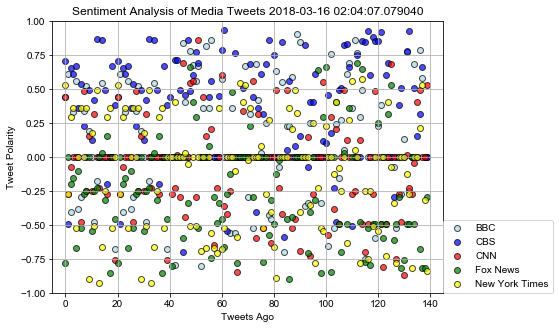

In [4]:
x_axis = np.arange(len(BBC_df)) # set up our x axis, all of the dfs should be 140 long so whichever is fine to len()

plt.figure(figsize=(7,5)) # I like this size, fight me.

# Plot each df and color individually
plt.scatter(x_axis, BBC_df["Compound"], color="lightblue", edgecolor = "black", marker="o", label="BBC", alpha=0.7)
plt.scatter(x_axis, CBS_df["Compound"], color="blue", edgecolor = "black", marker="o", label="CBS", alpha=0.7)
plt.scatter(x_axis, CNN_df["Compound"], color="red", edgecolor = "black", marker="o", label="CNN", alpha=0.7)
plt.scatter(x_axis, FOX_df["Compound"], color="green", edgecolor = "black", marker="o", label="Fox News", alpha=0.7)
plt.scatter(x_axis, NYT_df["Compound"], color="yellow", edgecolor = "black", marker="o", label="New York Times", alpha=0.7)

# Other plotty fun
plt.xlabel("Tweets Ago")
plt.ylabel("Tweet Polarity")
plt.title(f"Sentiment Analysis of Media Tweets {now}")
plt.legend(loc=(1,0))
plt.grid(True)
plt.xlim(-5, 145)
plt.ylim(-1, 1)

sns.set()

# Save and show
plt.savefig("TweetScatter.png")
plt.show()

### Plot the sentiments as a bar chart

In [5]:
color_list = ["lightblue", "blue", "red", "green", "yellow"] # Set this up because I think I might be lazy or need it?
sentiment_dict = {
    "BBC": BBC_df[BBC_df["NotZero"] == True]["Compound"].mean(),
    "CBS": CBS_df[CBS_df["NotZero"] == True]["Compound"].mean(),
    "CNN": CNN_df[CNN_df["NotZero"] == True]["Compound"].mean(),
    "Fox": FOX_df[FOX_df["NotZero"] == True]["Compound"].mean(),
    "NYT": NYT_df[NYT_df["NotZero"] == True]["Compound"].mean()
} # Hmm
x_axis = np.arange(len(sentiment_dict)) #New x axis

In [6]:
# Took this from a link from a previous homework tip, modified to display decimals
def autolabel(rects, ax):
    # Get y-axis height to calculate label position from.
    (y_bottom, y_top) = ax.get_ylim()
    y_height = y_top - y_bottom

    for rect in rects:
        height = rect.get_height()
        label_position = height + (y_height * 0.01)

        ax.text(rect.get_x() + rect.get_width()/2., label_position,
                '%.2f' % height,
                ha='center', va='bottom')

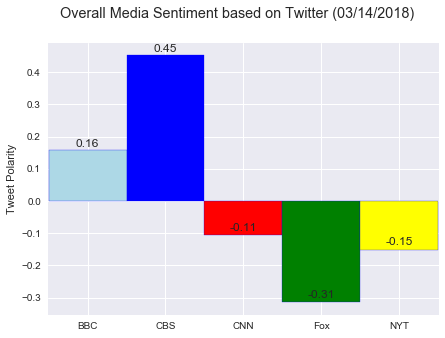

In [7]:
# Whizzo butter plots your colorful bar plots!
fig, ax = plt.subplots(figsize=(7,5)) # Let's do it this way this time
width = 1 # width is 4 more characters than 1, but I will use a variable here

# Plot everything and call the above function for each to put numbers over the bars all pretty like
bbc_rect = ax.bar(x_axis[0], sentiment_dict["BBC"], width=width, color=color_list[0], label="BBC", edgecolor="b")
autolabel(bbc_rect, ax)
cbs_rect = ax.bar(x_axis[1], sentiment_dict["CBS"], width=width, color=color_list[1], label="CBS", edgecolor="b")
autolabel(cbs_rect, ax)
cnn_rect = ax.bar(x_axis[2], sentiment_dict["CNN"], width=width, color=color_list[2], label="CNN", edgecolor="b")
autolabel(cnn_rect, ax)
fox_rect = ax.bar(x_axis[3], sentiment_dict["Fox"], width=width, color=color_list[3], label="Fox News", edgecolor="b")
autolabel(fox_rect, ax)
nyt_rect = ax.bar(x_axis[4], sentiment_dict["NYT"], width=width, color=color_list[4], label="New York Times", edgecolor="b")
autolabel(nyt_rect, ax)

# Other graphy things
ax.set_xticks(x_axis)
ax.set_xticklabels(sentiment_dict.keys())
ax.set_xlabel("")
ax.set_ylabel("Tweet Polarity")
fig.suptitle("Overall Media Sentiment based on Twitter (03/14/2018)")
ax.set_xlim(-0.51,4.51)

# Save and show
plt.savefig("TweetBar.png")
plt.show()

In [8]:
sentiment_df.to_csv("sentiments.csv", encoding="utf-8")